In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import re



In [2]:
# path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-ica-pyprep\05s")
path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-pyprep-first-four\05s")
# path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-multitaper-drop-pyprep\02s")
# path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-pyprep\02s")
# path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-ica-rejection-pyprep\02s")


trials = []

filter_data = True
sess_to_use = ['1','2','3','4','5','6','7','8']
users_to_use = ['UI01','UI02','UI03','UI04','UI05','UI06','UI07','UI08']
# users_to_use = ['UI02']
 
            
for file in path.rglob("*.txt"):
    data = pd.read_csv(file, index_col=0)
    
    uid = re.findall('.+(?=_S[0-9]_T[0-9]_)', file.name)[0]
    session = re.findall('(?<=_S)[0-9](?=_T[0-9]_)', file.name)[0]
    trial = re.findall('(?<=_S[0-9]_T)[0-9](?=_)', file.name)[0]
    
    data.loc[:,'session'] = session
    data.loc[:,'user_id'] = uid
    
    if filter_data:
        if session in sess_to_use and uid in users_to_use:
            print(file.name, uid, session, trial)
            trials.append(data)
    else:
        trials.append(data)

data = pd.concat(trials) 
data = data.reset_index() #Reset index

#Add labels
data['workload'] = 'Low'
data.loc[data['Label']==1, 'workload'] = 'High'

data.head()

UI01_S1_T1_pow.txt UI01 1 1
UI01_S1_T2_pow.txt UI01 1 2
UI01_S1_T3_pow.txt UI01 1 3
UI01_S1_T4_pow.txt UI01 1 4
UI01_S1_T5_pow.txt UI01 1 5
UI01_S1_T6_pow.txt UI01 1 6
UI01_S2_T1_pow.txt UI01 2 1
UI01_S2_T2_pow.txt UI01 2 2
UI01_S2_T3_pow.txt UI01 2 3
UI01_S2_T4_pow.txt UI01 2 4
UI01_S2_T5_pow.txt UI01 2 5
UI01_S2_T6_pow.txt UI01 2 6
UI01_S3_T1_pow.txt UI01 3 1
UI01_S3_T2_pow.txt UI01 3 2
UI01_S3_T3_pow.txt UI01 3 3
UI01_S3_T4_pow.txt UI01 3 4
UI01_S3_T5_pow.txt UI01 3 5
UI01_S3_T6_pow.txt UI01 3 6
UI01_S4_T1_pow.txt UI01 4 1
UI01_S4_T2_pow.txt UI01 4 2
UI01_S4_T3_pow.txt UI01 4 3
UI01_S4_T4_pow.txt UI01 4 4
UI01_S4_T5_pow.txt UI01 4 5
UI01_S4_T6_pow.txt UI01 4 6
UI02_S1_T1_pow.txt UI02 1 1
UI02_S1_T2_pow.txt UI02 1 2
UI02_S1_T3_pow.txt UI02 1 3
UI02_S1_T4_pow.txt UI02 1 4
UI02_S1_T5_pow.txt UI02 1 5
UI02_S1_T6_pow.txt UI02 1 6
UI02_S2_T1_pow.txt UI02 2 1
UI02_S2_T2_pow.txt UI02 2 2
UI02_S2_T3_pow.txt UI02 2 3
UI02_S2_T4_pow.txt UI02 2 4
UI02_S2_T5_pow.txt UI02 2 5
UI02_S2_T6_pow.txt U

,index,FP1-Delta,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Delta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Delta,...,PO4-Alpha,PO4-Beta,OZ-Delta,OZ-Theta,OZ-Alpha,OZ-Beta,Label,session,user_id,workload
0,T1_0,0.853218,0.125958,0.017588,0.003072,0.864601,0.117445,0.013605,0.004057,0.834036,...,0.068634,0.074769,0.803991,0.077352,0.051726,0.062446,0.0,1,UI01,Low
1,T1_1,0.747614,0.212965,0.034554,0.004783,0.781189,0.183099,0.031641,0.003924,0.671418,...,0.059024,0.038867,0.764435,0.142491,0.061518,0.030448,0.0,1,UI01,Low
2,T1_2,0.896515,0.095336,0.007030,0.001018,0.907430,0.085458,0.005544,0.001511,0.892133,...,0.038045,0.021432,0.855868,0.095612,0.019734,0.027693,0.0,1,UI01,Low
3,T1_3,0.861720,0.123879,0.012580,0.001740,0.858902,0.128295,0.011089,0.001613,0.846860,...,0.049013,0.026110,0.881882,0.081029,0.020136,0.016191,0.0,1,UI01,Low
4,T1_4,0.995367,0.003961,0.000435,0.000215,0.923922,0.049585,0.010380,0.014765,0.934873,...,0.019451,0.024589,0.913851,0.048561,0.012889,0.023582,0.0,1,UI01,Low


In [3]:
#Balance high and low workload samples
low_data = data.loc[data['workload']=='Low',:]
high_data = data.loc[data['workload']=='High',:]

remove_n = abs(low_data.shape[0]- high_data.shape[0])
if low_data.shape[0]>high_data.shape[0]:
    print("Removing low samples")
    drop_indices = np.random.choice(low_data.index, remove_n, replace=False)
    low_data = low_data.drop(drop_indices)
elif high_data.shape[0]>low_data.shape[0]:
    print("Removing high samples")
    drop_indices = np.random.choice(high_data.index, remove_n, replace=False)
    high_data = high_data.drop(drop_indices)

print("Removed: ", remove_n, "low", low_data.shape[0], "high", high_data.shape[0])

data = pd.concat((low_data,high_data))
# drop_indices

Removing low samples
Removed:  60 low 5748 high 5748


In [4]:
meta_data = data.copy(deep=True).iloc[:,-4:]
orig_data = data.copy(deep=True)
data_reduced_complete = orig_data.rename(columns=lambda x:x.replace('-','_'))

data.head()

,index,FP1-Delta,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Delta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Delta,...,PO4-Alpha,PO4-Beta,OZ-Delta,OZ-Theta,OZ-Alpha,OZ-Beta,Label,session,user_id,workload
0,T1_0,0.853218,0.125958,0.017588,0.003072,0.864601,0.117445,0.013605,0.004057,0.834036,...,0.068634,0.074769,0.803991,0.077352,0.051726,0.062446,0.0,1,UI01,Low
1,T1_1,0.747614,0.212965,0.034554,0.004783,0.781189,0.183099,0.031641,0.003924,0.671418,...,0.059024,0.038867,0.764435,0.142491,0.061518,0.030448,0.0,1,UI01,Low
2,T1_2,0.896515,0.095336,0.007030,0.001018,0.907430,0.085458,0.005544,0.001511,0.892133,...,0.038045,0.021432,0.855868,0.095612,0.019734,0.027693,0.0,1,UI01,Low
3,T1_3,0.861720,0.123879,0.012580,0.001740,0.858902,0.128295,0.011089,0.001613,0.846860,...,0.049013,0.026110,0.881882,0.081029,0.020136,0.016191,0.0,1,UI01,Low
4,T1_4,0.995367,0.003961,0.000435,0.000215,0.923922,0.049585,0.010380,0.014765,0.934873,...,0.019451,0.024589,0.913851,0.048561,0.012889,0.023582,0.0,1,UI01,Low


# Anova model


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import seaborn as sns


In [8]:
results = pd.DataFrame(columns=['workload-pvalue','session-pvalue','userid-pvalue'])
for col in data_reduced_complete.columns[1:-4]:
#     anova_model  = "{:} ~ C(workload) + C(session)".format(col)
    anova_model  = "{:} ~ C(workload) + C(user_id)  + C(session)".format(col)  
    model = ols(anova_model, data=data_reduced_complete).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    results.loc[col,'workload-pvalue'] = anova_table.loc['C(workload)','PR(>F)']
    results.loc[col,'session-pvalue']  = anova_table.loc['C(session)','PR(>F)']
    
pvalues_results = results
results = results.loc[results['workload-pvalue']<0.001]

significant_feat ={'Delta':[],'Theta':[],'Alpha':[],'Beta':[]}
for idx,feat in enumerate(results.index):
    ch, bd = feat.split("_")
#     print(idx, feat)
    significant_feat[bd].append(ch)

for k,v in significant_feat.items():
    print(k,len(v))

Delta 14
Theta 24
Alpha 11
Beta 17


# Topoplots


In [9]:
#Split into theta, alpha, beta
delta_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}
theta_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}
alpha_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}
beta_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}

for w in ['High','Low']:
    mean_data = data_reduced_complete.loc[data_reduced_complete['workload'] == w].mean(axis=0)
    
    for idx in mean_data.index[:-2]:
        ch, bd = idx.split('_')
        if bd == "Delta":
            delta_frame[w].loc[ch] = mean_data[idx]
        elif bd == "Theta":
            theta_frame[w].loc[ch] = mean_data[idx]
        elif bd == "Alpha":
            alpha_frame[w].loc[ch] = mean_data[idx]
        elif bd == "Beta":
            beta_frame[w].loc[ch] = mean_data[idx]

In [48]:
def clean_axes(a):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["left"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.set_xticks([])
    a.set_xticks([],minor=True)
    a.set_yticks([])
    a.set_yticks([],minor=True)
            
def create_topoplots(data_frame,fig_title, sig_feat2, v_min=None, v_max=None, ch_to_plot=None):
    from mne.viz import plot_topomap
    
    if ch_to_plot is None:
        ch_to_plot = data_frame["High"].index
   
    mask = np.array([True if ch in sig_feat2 else False for ch in data_frame["High"].index])
    mask = pd.DataFrame(mask, index = data_frame["High"].index, columns=['plot'])
    mask = mask.loc[ch_to_plot]
   
    locations = pd.read_csv('./channel_2d_location.csv', index_col=0)
    locations = locations.drop(index=["PO8","PO7"])
    locations = locations.loc[ch_to_plot]
    
    data_high = data_frame["High"].loc[ch_to_plot]
    data_low = data_frame["Low"].loc[ch_to_plot]
    
    fig, ax = plt.subplots(1,4, figsize= (20,8),gridspec_kw={'width_ratios': [5,1,5,1]})
    fig.suptitle(fig_title, fontsize=20)

    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k',
         linewidth=0, markersize=15)
    
    #Plot High
    ax_title = "High"
    ax[0].set_title(ax_title)
    im, cn = plot_topomap(data_high['relative_mean'].values, locations[['x','y']].values,
                          outlines='head', axes=ax[0],cmap='RdBu_r',show=False,
                          names = data_high.index, show_names=True,
                          mask=mask.loc[ch_to_plot,"plot"],mask_params=mask_params,vmin=v_min, vmax=v_max,)
    fig.colorbar(im, ax=ax[1]); clean_axes(ax[1]);
    
    #Plot Low
    ax_title = "Low"
    ax[2].set_title(ax_title)
    im, cn = plot_topomap(data_low['relative_mean'].values, locations[['x','y']].values,
                          outlines='head', axes=ax[2],cmap='RdBu_r',show=False,
                          names = data_high.index, show_names=True,
                          mask=mask.loc[ch_to_plot,"plot"],mask_params=mask_params, vmin=v_min, vmax=v_max,)
    fig.colorbar(im, ax=ax[3]); clean_axes(ax[3]);
    
    print("High range [{:}, {:}]".format(data_high['relative_mean'].min(),data_high['relative_mean'].max()))
    print("Low  range [{:}, {:}]".format(data_low['relative_mean'].min(),data_low['relative_mean'].max()))
    plt.show()
    
def create_topoplot_of_diff(data_frame,fig_title, sig_feat2, v_min=-0.022, v_max=0.022):
    from mne.viz import plot_topomap
    
    mask = np.array([True if ch in sig_feat2 else False for ch in data_frame["High"].index])

    locations = pd.read_csv('./channel_2d_location.csv', index_col=0)
    locations = locations.drop(index=["PO8","PO7"])

    
    fig, ax = plt.subplots(1,2, figsize= (20,8),gridspec_kw={'width_ratios': [8,1]})
    fig.suptitle(fig_title, fontsize=20)

    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k',
         linewidth=0, markersize=12)
    

    data = data_frame["High"]['relative_mean'].values - data_frame["Low"]['relative_mean'].values

    im, cn = plot_topomap(data, locations[['x','y']].values,
                          outlines='head', axes=ax[0],cmap='jet',show=False,
                          names = theta_frame["High"].index, show_names=True,
                          mask=mask,mask_params=mask_params,
                          vmin=v_min, vmax=v_max, contours=7)
    
    print( "Data max {:0.3f} Data min {:0.3f}".format(data.max(),data.min()) )
    fig.colorbar(im, ax=ax[1])
    clean_axes(ax[1])
    plt.show()

from IPython.core.debugger import set_trace
def create_topo(data_frame,fig_title, sig_feat2,ax, v_min=-0.022, v_max=0.022, db=True):
    from mne.viz import plot_topomap
    
    mask = np.array([True if ch in sig_feat2 else False for ch in data_frame["High"].index])

    locations = pd.read_csv('./channel_2d_location.csv', index_col=0)
    locations = locations.drop(index=["PO8","PO7"])

    
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k',
         linewidth=0, markersize=20)
    
#     set_trace()
    if db:
#       Decibel function => 10 * np.log10
        data = np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])
        data = 10 * data
        
        #Remove channels with differences lower than threshold
        mask2 = abs(data) > 0.24
        mask  = mask2 & mask
    else:
        baseline = data_frame["Low"]['relative_mean']
        data = 100 * (data_frame["High"]['relative_mean'] - baseline)/baseline
    
    print("{:} Data max {:0.3f} Data min {:0.3f}".format(fig_title, data.max(),data.min()) )
    activatedCh = data.loc[mask].loc[data>0].index.values; supressedCh = data.loc[mask].loc[data<0].index.values;
    print("Activation during high: "+",".join(activatedCh))#list(map(str,activatedCh))
    print("Supression during low: "+",".join(supressedCh))
    im, cn = plot_topomap(data.values, locations[['x','y']].values,
                          outlines='head', axes=ax,cmap='jet',show=False,
                          names = theta_frame["High"].index, show_names=True,
                          mask=mask,mask_params=mask_params,
                          vmin=v_min, vmax=v_max, contours=7)
    ax.set_title(fig_title, fontsize = 28)
    return im
    
def create_topoplot_of_multiple_bands(frame_list,title_list, sig_feat_list, v_min=-0.025, v_max=0.025, db=True):
    
    fig, axes = plt.subplots(1,5, figsize=(30,10), gridspec_kw={'width_ratios': [3,3,3,3,1]})
    axes = axes.reshape((-1,1)).squeeze()
    
    for d, t, sig_feat, ax in zip(frame_list,title_list,sig_feat_list, axes):
        im = create_topo(d,t,sig_feat, ax,v_min=v_min, v_max=v_max, db=db )
    
    cbar = fig.colorbar(im, ax=axes[-1])
    clean_axes(axes[-1])   
    
    if db:
        ti = 'dB change from low state'
    else:
        ti = 'percent change from low state'
    cbar.ax.set_ylabel(ti, rotation=270, fontsize=20, labelpad=22)
    cbar.ax.yaxis.set_ticks_position('left')

    
    fig.tight_layout()
    plt.show()

Delta [0.5-4Hz] Data max 0.084 Data min -0.339
Activation during high: 
Supression during low: F7,FC5,FC6,T8
Theta [4-8Hz] Data max 0.611 Data min 0.031
Activation during high: FP1,AF3,AF4,F7,F3,F4,F8,FC5,FC2,FC6,T7,C3,C4,T8,CP5
Supression during low: 
Alpha [8-12Hz] Data max 0.664 Data min -0.178
Activation during high: F7,F8,FC5,FC6,T7,C4,T8,CP5,CP6
Supression during low: 
Beta [12-30Hz] Data max 0.356 Data min -0.419
Activation during high: F8,FC6,T8,OZ
Supression during low: FZ,F4,FC2,C3,CZ,CP5,CP2


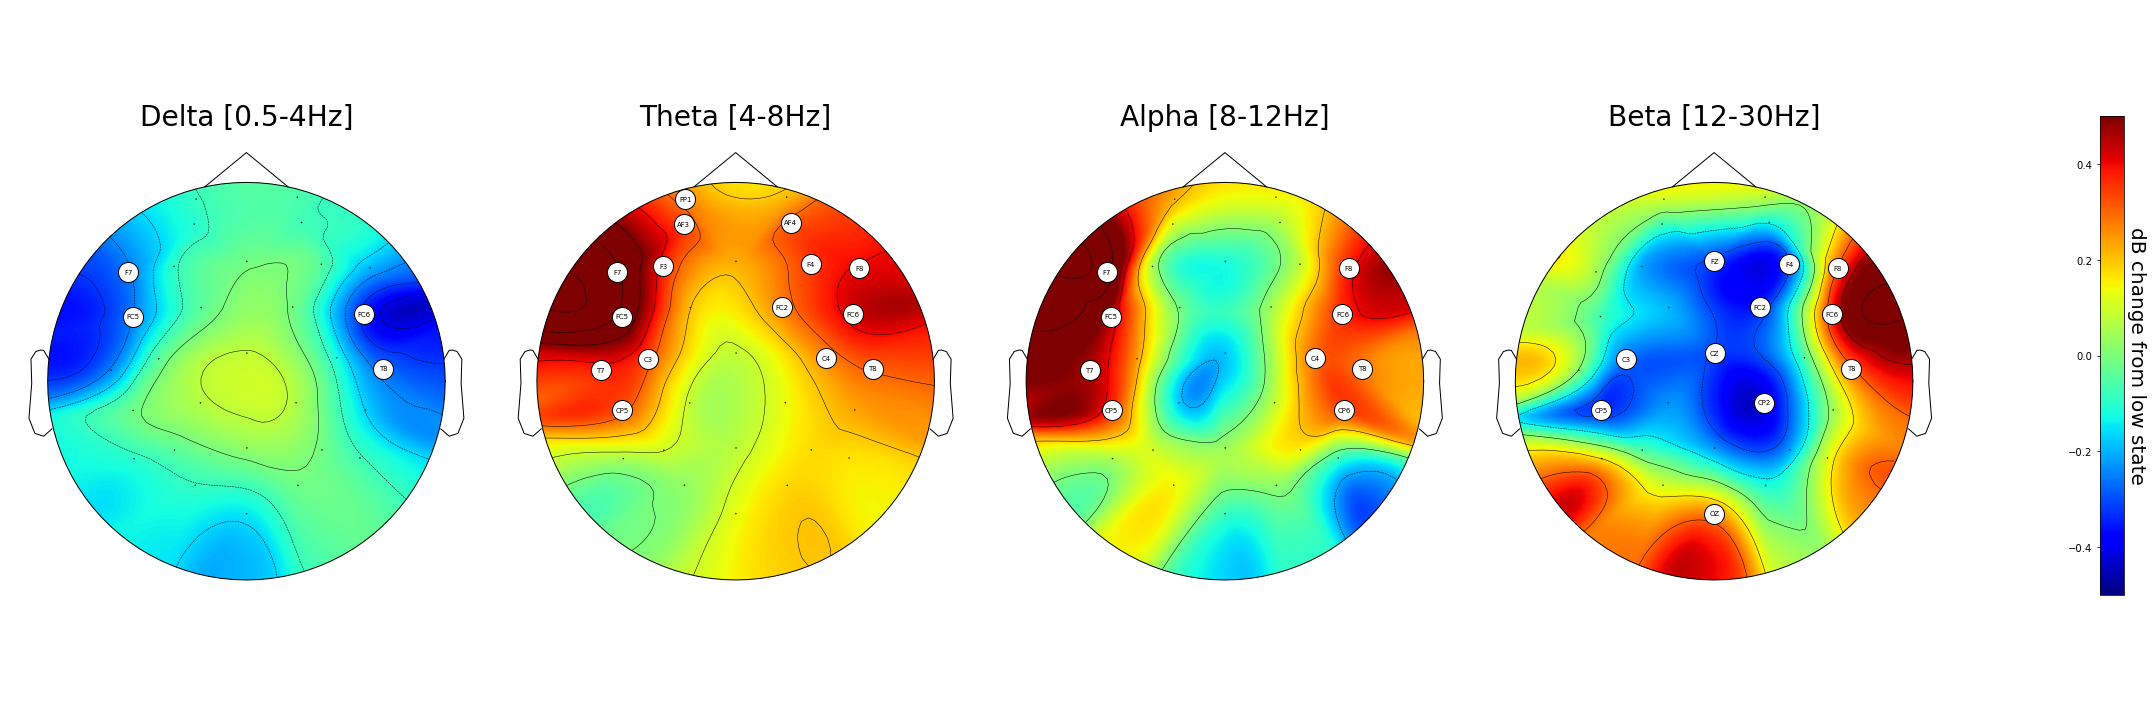

Delta [0.5-4Hz] Data max 1.946 Data min -7.504
Activation during high: CZ
Supression during low: FP1,AF3,F7,F3,F8,FC5,FC6,T7,C4,T8,CP6,P7,OZ
Theta [4-8Hz] Data max 15.112 Data min 0.727
Activation during high: FP1,FP2,AF3,AF4,F7,F3,FZ,F4,F8,FC5,FC1,FC2,FC6,T7,C3,C4,T8,CP5,CP2,CP6,P4,P8,PO4,OZ
Supression during low: 
Alpha [8-12Hz] Data max 16.508 Data min -4.012
Activation during high: F7,F8,FC5,FC6,T7,C3,C4,T8,CP5,CP6,P4
Supression during low: 
Beta [12-30Hz] Data max 8.548 Data min -9.190
Activation during high: F8,FC6,T8,P7,OZ
Supression during low: F3,FZ,F4,FC1,FC2,C3,CZ,CP5,CP1,CP2,PZ,P4


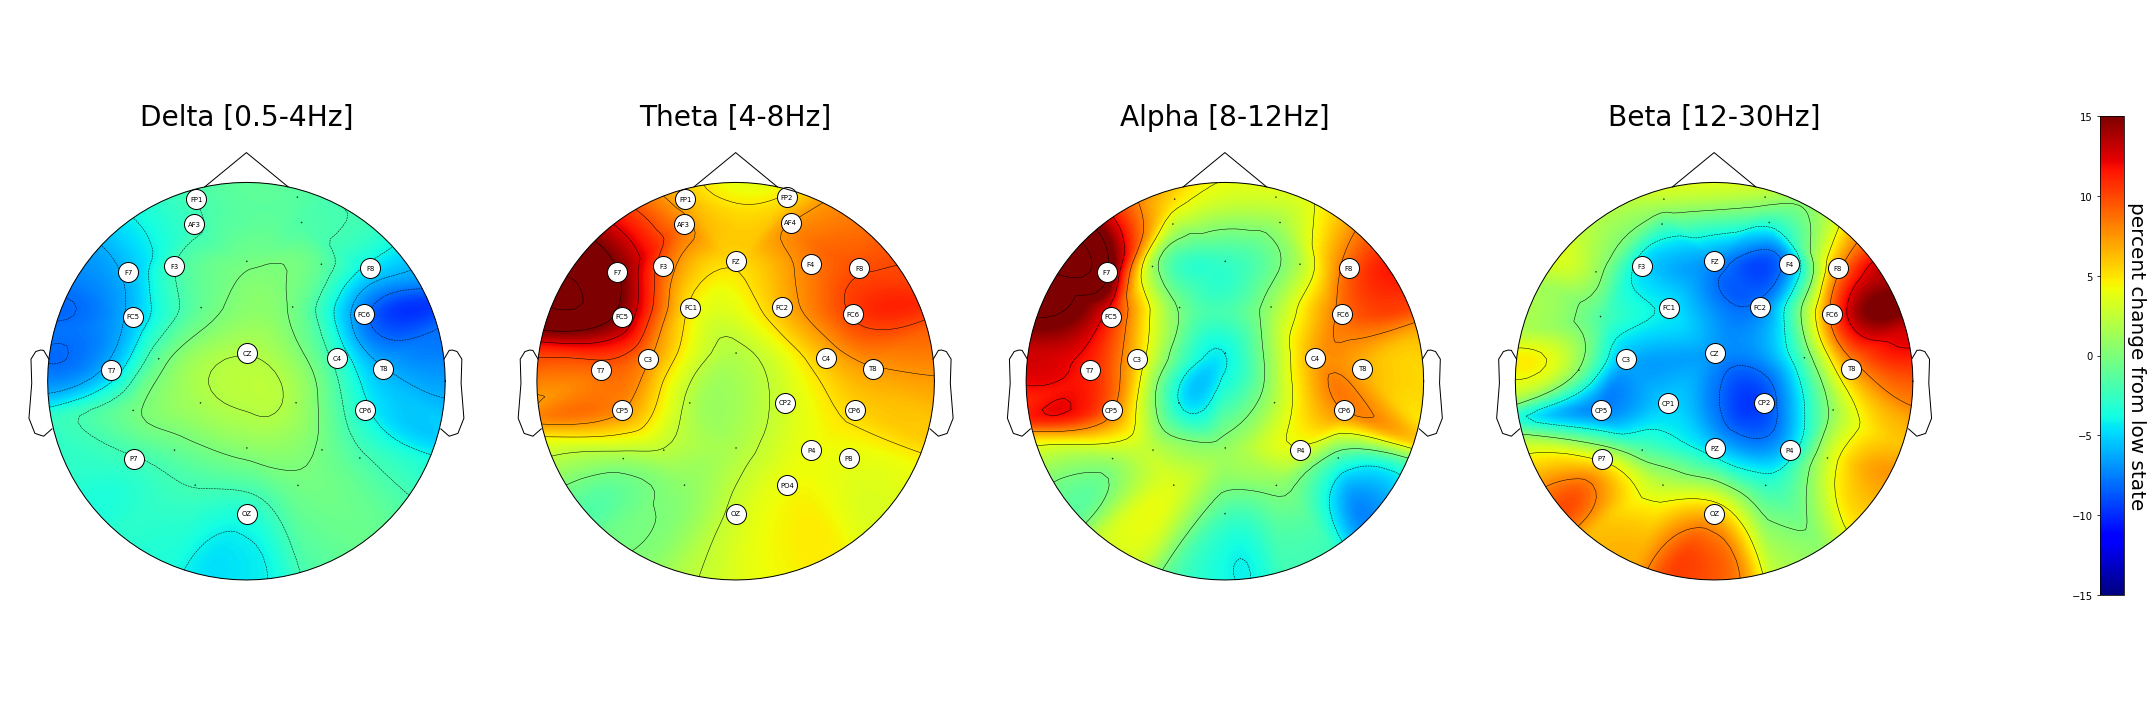

In [50]:
frames = [delta_frame, theta_frame, alpha_frame, beta_frame]
titles = ["Delta [0.5-4Hz]","Theta [4-8Hz]","Alpha [8-12Hz]","Beta [12-30Hz]"]
sig_feats = [significant_feat['Delta'],significant_feat['Theta'],significant_feat['Alpha'],significant_feat['Beta']]

create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.5, v_max=0.5, db=True)
create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-15, v_max=15, db=False)
# create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.025, v_max=0.025, db=False)

In [ ]:
frames = [delta_frame, theta_frame, alpha_frame, beta_frame]
titles = ["Delta [0.5-4Hz]","Theta [4-8Hz]","Alpha [8-12Hz]","Beta [12-30Hz]"]
sig_feats = [significant_feat['Delta'],significant_feat['Theta'],significant_feat['Alpha'],significant_feat['Beta']]

create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.5, v_max=0.5, db=True)
create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-15, v_max=15, db=False)
# create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.025, v_max=0.025, db=False)

> <ipython-input-13-585fe4679fba>(99)create_topo()
     97 
     98     set_trace()
---> 99     if db:
    100 #       Decibel function => 10 * np.log10
    101         data = np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)



ipdb>  type(data_frame)


<class 'dict'>


ipdb>  data_frame.keys()


dict_keys(['Low', 'High'])


ipdb>  type(data_frame['Low'])


<class 'pandas.core.frame.DataFrame'>


ipdb>  data_frame['Low'].columns


Index(['relative_mean'], dtype='object')


ipdb>  data_frame['Low'].index


Index(['FP1', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FC5', 'FC1',
       'FC2', 'FC6', 'T7', 'C3', 'CZ', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6',
       'P7', 'P3', 'PZ', 'P4', 'P8', 'PO3', 'PO4', 'OZ'],
      dtype='object')


ipdb>  np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)


array([-0.00854571, -0.00594914, -0.01019555, -0.00701046, -0.02492367,
       -0.00901308, -0.00102892, -0.00473515, -0.01985962, -0.02403011,
       -0.00363237, -0.00105848, -0.03387491, -0.02292743, -0.00352134,
        0.00836933, -0.01153039, -0.02648387, -0.00127393,  0.00694308,
        0.00619722, -0.01629231, -0.00931705, -0.00359543,  0.00286556,
       -0.00120866, -0.00733193, -0.00835702, -0.00138301, -0.0140444 ])


ipdb>  np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  test = np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])
ipdb>  test


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  abs(test['relative_mean']) > 0.2


*** KeyError: 'relative_mean'


ipdb>  type(test)


<class 'pandas.core.series.Series'>


ipdb>  abs(test) > 0.2


FP1    False
FP2    False
AF3    False
AF4    False
F7     False
F3     False
FZ     False
F4     False
F8     False
FC5    False
FC1    False
FC2    False
FC6    False
T7     False
C3     False
CZ     False
C4     False
T8     False
CP5    False
CP1    False
CP2    False
CP6    False
P7     False
P3     False
PZ     False
P4     False
P8     False
PO3    False
PO4    False
OZ     False
Name: relative_mean, dtype: bool


In [ ]:
frames = [delta_frame, theta_frame, alpha_frame, beta_frame]
titles = ["Delta [0.5-4Hz]","Theta [4-8Hz]","Alpha [8-12Hz]","Beta [12-30Hz]"]
sig_feats = [significant_feat['Delta'],significant_feat['Theta'],significant_feat['Alpha'],significant_feat['Beta']]

create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.5, v_max=0.5, db=True)
create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-15, v_max=15, db=False)
# create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.025, v_max=0.025, db=False)

> <ipython-input-13-585fe4679fba>(99)create_topo()
     97 
     98     set_trace()
---> 99     if db:
    100 #       Decibel function => 10 * np.log10
    101         data = np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)



ipdb>  type(data_frame)


<class 'dict'>


ipdb>  data_frame.keys()


dict_keys(['Low', 'High'])


ipdb>  type(data_frame['Low'])


<class 'pandas.core.frame.DataFrame'>


ipdb>  data_frame['Low'].columns


Index(['relative_mean'], dtype='object')


ipdb>  data_frame['Low'].index


Index(['FP1', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FC5', 'FC1',
       'FC2', 'FC6', 'T7', 'C3', 'CZ', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6',
       'P7', 'P3', 'PZ', 'P4', 'P8', 'PO3', 'PO4', 'OZ'],
      dtype='object')


ipdb>  np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)


array([-0.00854571, -0.00594914, -0.01019555, -0.00701046, -0.02492367,
       -0.00901308, -0.00102892, -0.00473515, -0.01985962, -0.02403011,
       -0.00363237, -0.00105848, -0.03387491, -0.02292743, -0.00352134,
        0.00836933, -0.01153039, -0.02648387, -0.00127393,  0.00694308,
        0.00619722, -0.01629231, -0.00931705, -0.00359543,  0.00286556,
       -0.00120866, -0.00733193, -0.00835702, -0.00138301, -0.0140444 ])


ipdb>  np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  test = np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])
ipdb>  test


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  abs(test['relative_mean']) > 0.2


*** KeyError: 'relative_mean'


ipdb>  type(test)


<class 'pandas.core.series.Series'>


In [ ]:
frames = [delta_frame, theta_frame, alpha_frame, beta_frame]
titles = ["Delta [0.5-4Hz]","Theta [4-8Hz]","Alpha [8-12Hz]","Beta [12-30Hz]"]
sig_feats = [significant_feat['Delta'],significant_feat['Theta'],significant_feat['Alpha'],significant_feat['Beta']]

create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.5, v_max=0.5, db=True)
create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-15, v_max=15, db=False)
# create_topoplot_of_multiple_bands(frames, titles, sig_feats,v_min=-0.025, v_max=0.025, db=False)

> <ipython-input-13-585fe4679fba>(99)create_topo()
     97 
     98     set_trace()
---> 99     if db:
    100 #       Decibel function => 10 * np.log10
    101         data = np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)



ipdb>  type(data_frame)


<class 'dict'>


ipdb>  data_frame.keys()


dict_keys(['Low', 'High'])


ipdb>  type(data_frame['Low'])


<class 'pandas.core.frame.DataFrame'>


ipdb>  data_frame['Low'].columns


Index(['relative_mean'], dtype='object')


ipdb>  data_frame['Low'].index


Index(['FP1', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FC5', 'FC1',
       'FC2', 'FC6', 'T7', 'C3', 'CZ', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6',
       'P7', 'P3', 'PZ', 'P4', 'P8', 'PO3', 'PO4', 'OZ'],
      dtype='object')


ipdb>  np.log10(data_frame["High"]['relative_mean'].values) - np.log10(data_frame["Low"]['relative_mean'].values)


array([-0.00854571, -0.00594914, -0.01019555, -0.00701046, -0.02492367,
       -0.00901308, -0.00102892, -0.00473515, -0.01985962, -0.02403011,
       -0.00363237, -0.00105848, -0.03387491, -0.02292743, -0.00352134,
        0.00836933, -0.01153039, -0.02648387, -0.00127393,  0.00694308,
        0.00619722, -0.01629231, -0.00931705, -0.00359543,  0.00286556,
       -0.00120866, -0.00733193, -0.00835702, -0.00138301, -0.0140444 ])


ipdb>  np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  test = np.log10(data_frame["High"]['relative_mean']) - np.log10(data_frame["Low"]['relative_mean'])
ipdb>  test


FP1   -0.008546
FP2   -0.005949
AF3   -0.010196
AF4   -0.007010
F7    -0.024924
F3    -0.009013
FZ    -0.001029
F4    -0.004735
F8    -0.019860
FC5   -0.024030
FC1   -0.003632
FC2   -0.001058
FC6   -0.033875
T7    -0.022927
C3    -0.003521
CZ     0.008369
C4    -0.011530
T8    -0.026484
CP5   -0.001274
CP1    0.006943
CP2    0.006197
CP6   -0.016292
P7    -0.009317
P3    -0.003595
PZ     0.002866
P4    -0.001209
P8    -0.007332
PO3   -0.008357
PO4   -0.001383
OZ    -0.014044
Name: relative_mean, dtype: float64


ipdb>  abs(test['relative_mean']) > 0.2


*** KeyError: 'relative_mean'


ipdb>  type(test)


<class 'pandas.core.series.Series'>


High range [0.4282806191917965, 0.5559606435747708]
Low  range [0.4433339406714717, 0.5853021886233973]


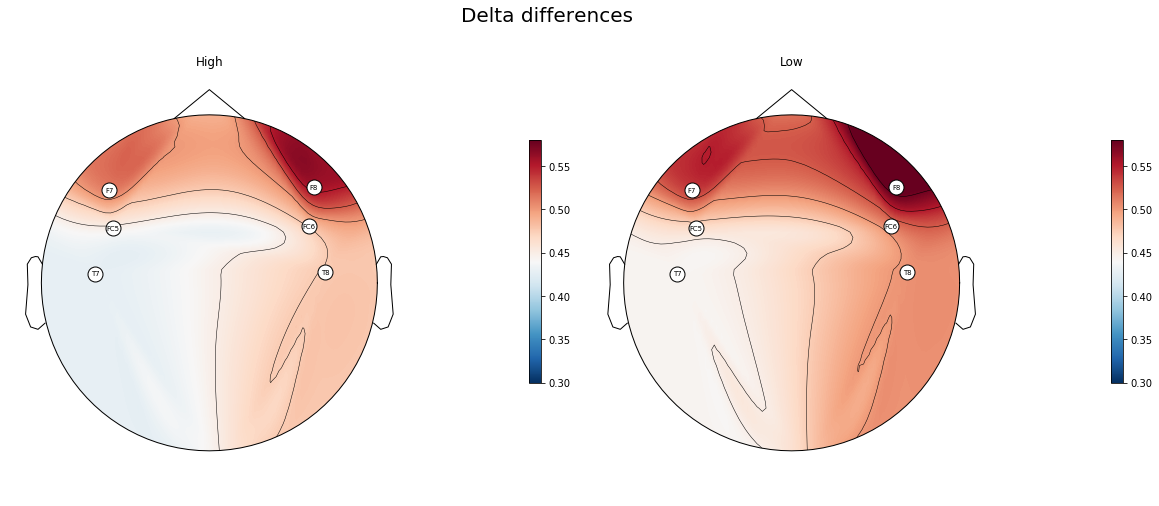

FC6   -0.033789
F8    -0.029342
T8    -0.026826
F7    -0.026049
CP6   -0.022036
FC5   -0.017751
AF3   -0.017104
T7    -0.015053
F3    -0.013591
OZ    -0.012048
P7    -0.011246
C4    -0.011217
FP1   -0.010389
PO3   -0.008552
AF4   -0.007489
P8    -0.006230
CP5   -0.005294
F4    -0.004955
FZ    -0.004379
FC1   -0.004120
PO4   -0.002225
FC2   -0.001203
C3    -0.000395
P3     0.000865
P4     0.004986
PZ     0.008460
FP2    0.009958
CZ     0.013656
CP1    0.014608
CP2    0.015010
Name: relative_mean, dtype: float64

In [10]:
v_min=0.39; v_max=0.575
# ["F7","F8","FC6","FC5","T8","T7"]
create_topoplots(delta_frame, "Delta differences", significant_feat['Delta'],ch_to_plot= ["F7","F8","FC6","FC5","T8","T7"],
                v_min=0.30, v_max=0.58)
dif = delta_frame["High"]['relative_mean'].values - delta_frame["Low"]['relative_mean'].values


delta_frame["High"]['relative_mean']
significant_feat['Delta']
pvalues_results

diff_frame = delta_frame["High"]['relative_mean'] - delta_frame["Low"]['relative_mean']
diff_frame = diff_frame.sort_values()
diff_frame

# create_topoplot_of_diff(delta_frame,"Delta differences (High - low)", significant_feat['Delta'])
# create_topoplot_of_diff(theta_frame,"Theta differences (High - low)", significant_feat['Theta'])
# create_topoplot_of_diff(alpha_frame,"Alpha differences (High - low)", significant_feat['Alpha'])
# create_topoplot_of_diff(beta_frame, "Beta differences  (High - low)", significant_feat['Beta'])

In [11]:
print("low samples", orig_data.loc[orig_data['workload']=='Low','FZ-Theta'].shape)
print("high samples", orig_data.loc[orig_data['workload']=='High','FZ-Theta'].shape)
orig_data.iloc[50:60]

low samples (5328,)
high samples (5328,)


,index,FP1-Delta,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Delta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Delta,...,PO4-Alpha,PO4-Beta,OZ-Delta,OZ-Theta,OZ-Alpha,OZ-Beta,Label,session,user_id,workload
50,T1_50,0.865459,0.074440,0.013972,0.039826,0.282936,0.138592,0.050697,0.431396,0.466423,...,0.089560,0.217491,0.359856,0.263616,0.046223,0.291173,0.0,1,UI01,Low
51,T1_51,0.780406,0.164787,0.032527,0.019805,0.699857,0.046428,0.045619,0.175064,0.562553,...,0.049081,0.130472,0.392797,0.073826,0.076570,0.356327,0.0,1,UI01,Low
52,T1_52,0.918062,0.056767,0.007385,0.016031,0.351669,0.126886,0.029204,0.420615,0.434291,...,0.044958,0.266911,0.191097,0.099696,0.051667,0.571305,0.0,1,UI01,Low
53,T1_53,0.819592,0.140492,0.027290,0.010771,0.356030,0.186669,0.068208,0.331861,0.329927,...,0.127405,0.206699,0.238624,0.162676,0.119504,0.395678,0.0,1,UI01,Low
54,T1_54,0.883616,0.081838,0.013032,0.018658,0.246592,0.082220,0.071430,0.520255,0.301934,...,0.120962,0.315250,0.348692,0.155209,0.088338,0.367912,0.0,1,UI01,Low
55,T1_55,0.813004,0.141707,0.022122,0.020616,0.156095,0.110595,0.052448,0.566517,0.314681,...,0.076598,0.331707,0.178944,0.081516,0.069592,0.610895,0.0,1,UI01,Low
56,T1_56,0.816882,0.146858,0.024419,0.010856,0.463630,0.091322,0.064000,0.335199,0.386756,...,0.078817,0.213757,0.208099,0.133325,0.102945,0.489830,0.0,1,UI01,Low
57,T1_57,0.835440,0.141601,0.016204,0.005608,0.496596,0.039910,0.072743,0.350318,0.425551,...,0.073785,0.191299,0.425630,0.104775,0.119031,0.314139,0.0,1,UI01,Low
58,T1_58,0.866369,0.120487,0.005074,0.007301,0.347145,0.085071,0.121063,0.390522,0.447099,...,0.130201,0.166743,0.514914,0.127286,0.101487,0.237902,0.0,1,UI01,Low
59,T1_59,0.899357,0.080393,0.007687,0.011682,0.493960,0.082678,0.075881,0.317271,0.579325,...,0.077503,0.200599,0.654935,0.089354,0.099482,0.142087,0.0,1,UI01,Low


In [13]:
def create_histograms(data, columns, ):
    columns_size = columns.shape[0]
    fig = plt.figure(figsize = (24, 28))

    for j, c in enumerate(columns):
        plt.subplot(int(columns_size/4)+1,4, j+1)
        ax = sns.histplot(data=data, x=c, kde=True, hue="workload", legend=True, stat="count")
        
    plt.show()
                     


In [14]:
prefrontal = ["FP1","FP2","AF3","AF4"]
frontal = ["F7","F3","FZ","F4","F8"]
frontal_central = ["FC5","FC1","FC2","FC6"]
temporal = ["T7","T8"]
central = ["C3","CZ","C4","CP5","CP1","CP2","CP6"]
parietal = ["P7","P3","PZ","P4","P8","PO3","PO4","OZ"]




Frontal


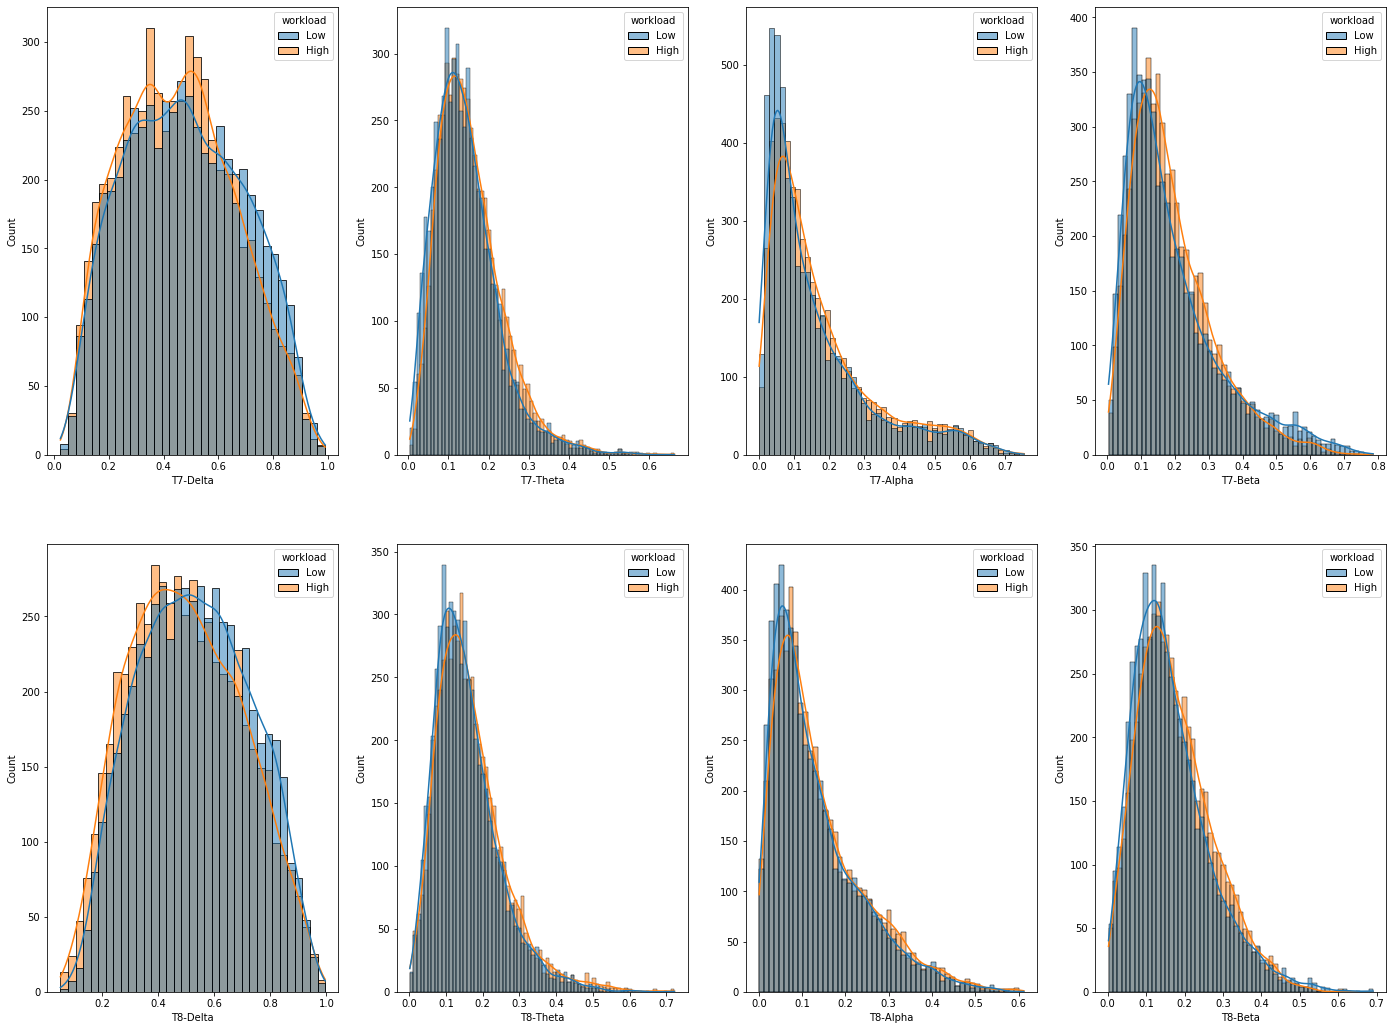

In [20]:
print("Frontal")
selected_cols = np.array([c for c in orig_data.columns if c.split('-')[0] in temporal])
create_histograms(orig_data,selected_cols)

# print("Frontal Central")
# selected_cols = np.array([c for c in orig_data.columns if c.split('-')[0] in frontal_central])
# create_histograms(orig_data,selected_cols)

# print("Central")
# selected_cols = np.array([c for c in orig_data.columns if c.split('-')[0] in central])
# create_histograms(orig_data,selected_cols)

# SVD analysis


In [16]:
svd_data = orig_data.iloc[:,1:-4]

svd_mat = svd_data.values

U, S, VT = np.linalg.svd(svd_mat,full_matrices=False)

print(svd_mat.shape)
print(U.shape)
print(S.shape)
print(VT.shape)
svd_data.head()
orig_data.head()
orig_data.iloc[40,-1]

(11496, 120)
(11496, 120)
(120,)
(120, 120)


'Low'

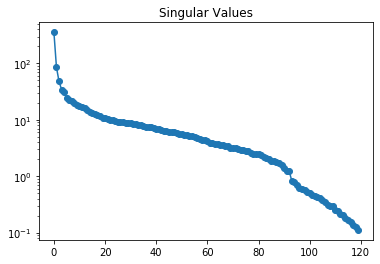

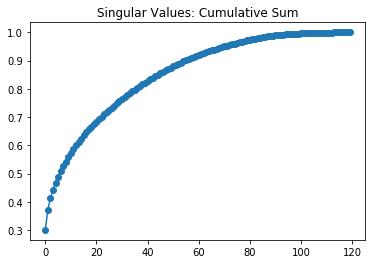

In [17]:
plt.figure(1)
plt.semilogy(S,'-o')
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(S)/np.sum(S),'-o')
plt.title('Singular Values: Cumulative Sum')
plt.show()

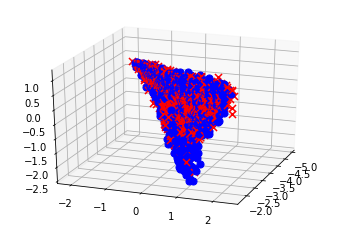

In [18]:
# from mpl_toolkits.mplot3d import Axes3D

# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')

# for j in range(svd_mat.shape[0]):
#     x = VT[0,:] @ svd_mat[j,:].T
#     y = VT[1,:] @ svd_mat[j,:].T
#     z = VT[2,:] @ svd_mat[j,:].T
    
#     if orig_data.iloc[j,-1] == 'High':
#         ax.scatter(x,y,z,marker='x',color='r',s=50)
#     else:
#         ax.scatter(x,y,z,marker='o',color='b',s=50)

# ax.view_init(25,20)
# plt.show()